# Comparing Florentine families to Monte Carlo simulations

In this notebook we perform numerical simulations of the SI process on the Florentines Families graph and compare the results with the exact solutions computed in the *Florentine Families.ipynb* notebook. First, let's set some definitions:


In [1]:
run ../SI_script.py

SI_script loaded!


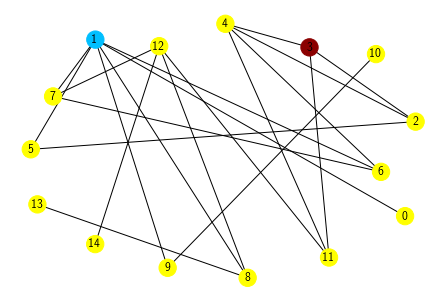

In [104]:
ff=nx.florentine_families_graph()
ff_names=list(ff.nodes())
A=nx.to_numpy_array(ff)
G=nx.from_numpy_matrix(A)
pat_0=3
medici=1
initialize_G(G,[pat_0])
G.nodes[medici]['state']='B'
nx.draw(G,node_color=coloring(G), with_labels=True)
N=len(G.nodes)

In [3]:
op_30=(20736000*t**5*exp(3*t) + 542592000*t**4*exp(3*t) + 4858128000*t**3*exp(3*t) + 59292000*t**3*exp(2*t) + 3367980000*t**2*exp(4*t) + 21478464000*t**2*exp(3*t) + 315657000*t**2*exp(2*t) + 6220800*t**2*exp(t) + 216000*t**2 + 4041576000*t*exp(4*t) + 51490488000*t*exp(3*t) + 302170500*t*exp(2*t) + 24131520*t*exp(t) + 882000*t + 46656000*exp(7*t) - 330683329*exp(6*t) - 55282675500*exp(4*t) + 55807960000*exp(3*t) - 252507375*exp(2*t) + 10096704*exp(t) + 1153500)*exp(-7*t)/46656000
op_31=(-6912*t**5*exp(3*t) - 169344*t**4*exp(3*t) - 1378224*t**3*exp(3*t) - 26352*t**3*exp(2*t) - 748440*t**2*exp(4*t) - 5540112*t**2*exp(3*t) - 120528*t**2*exp(2*t) - 3456*t**2*exp(t) - 144*t**2 - 149688*t*exp(4*t) - 12390504*t*exp(3*t) - 64152*t*exp(2*t) - 12024*t*exp(t) - 540*t + 5184*exp(7*t) + 12734103*exp(4*t) - 12881488*exp(3*t) + 145800*exp(2*t) - 2928*exp(t) - 671)*exp(-7*t)/5184 
op_32=-(15552*t**3*exp(2*t) - 576*t**3*exp(t) + 393912*t**2*exp(4*t) + 125388*t**2*exp(2*t) - 1728*t**2*exp(t) - 1552065*t*exp(4*t) - 1197504*t*exp(3*t) + 419904*t*exp(2*t) + 13248*t*exp(t) - 243*t - 31104*exp(7*t) + 2759555*exp(4*t) - 3027456*exp(3*t) + 247860*exp(2*t) + 51712*exp(t) - 567)*exp(-7*t)/31104
op_33=sympify(1)
op_34=(1728*t**3*exp(2*t) + 576*t**3*exp(t) + 21384*t**2*exp(3*t) + 50544*t**2*exp(2*t) + 8676*t**2*exp(t) - 72*t**2 + 132180*t*exp(3*t) + 204768*t*exp(2*t) + 40560*t*exp(t) - 276*t + 2592*exp(7*t) - 55559*exp(4*t) - 217794*exp(3*t) + 211896*exp(2*t) + 59042*exp(t) - 177)*exp(-7*t)/2592
op_35= (57600*t**4*exp(3*t) + 1461600*t**3*exp(3*t) - 144000*t**3*exp(2*t) + 11656800*t**2*exp(3*t) - 905400*t**2*exp(2*t) - 20400*t**2*exp(t) + 27136400*t*exp(4*t) + 46062000*t*exp(3*t) - 1552200*t*exp(2*t) - 87800*t*exp(t) + 780*t + 86400*exp(7*t) - 3719206*exp(5*t) - 64978425*exp(4*t) + 69065200*exp(3*t) - 395000*exp(2*t) - 59850*exp(t) + 881)*exp(-7*t)/86400
op_36=(20736*t**5*exp(3*t) + 599400*t**4*exp(3*t) - 2332800*t**3*exp(4*t) + 7244640*t**3*exp(3*t) + 14400*t**3*exp(t) + 4548960*t**2*exp(4*t) + 43412760*t**2*exp(3*t) + 417960*t**2*exp(2*t) + 181080*t**2*exp(t) - 3240*t**2 + 34988370*t*exp(4*t) + 129864600*t*exp(3*t) + 913680*t*exp(2*t) + 783720*t*exp(t) - 13230*t + 77760*exp(7*t) - 166152485*exp(4*t) + 166430880*exp(3*t) - 1419120*exp(2*t) + 1074080*exp(t) - 11115)*exp(-7*t)/77760
op_37=(13824*t**5*exp(3*t) + 490320*t**4*exp(3*t) - 2980800*t**3*exp(4*t) + 6033600*t**3*exp(3*t) - 45360*t**3*exp(2*t) + 2880*t**3*exp(t) + 9117360*t**2*exp(4*t) + 37927440*t**2*exp(3*t) - 77760*t**2*exp(2*t) + 5040*t**2*exp(t) + 16911630*t*exp(4*t) + 110623920*t*exp(3*t) + 239760*t*exp(2*t) - 21840*t*exp(t) + 870*t + 51840*exp(7*t) - 128017825*exp(4*t) + 127956560*exp(3*t) + 77760*exp(2*t) - 71120*exp(t) + 2785)*exp(-7*t)/51840
op_38=(57600*t**4*exp(3*t) + 864000*t**3*exp(4*t) + 1357200*t**3*exp(3*t) + 3742200*t**2*exp(4*t) + 7468200*t**2*exp(3*t) + 50400*t**2*exp(2*t) + 7127400*t*exp(4*t) + 17203200*t*exp(3*t) - 137400*t*exp(2*t) + 9300*t*exp(t) + 240*t + 43200*exp(7*t) - 5785093*exp(5*t) - 13718450*exp(4*t) + 20408000*exp(3*t) - 982700*exp(2*t) + 35525*exp(t) - 482)*exp(-7*t)/43200
op_39=(20736000*t**5*exp(3*t) + 542592000*t**4*exp(3*t) + 4858128000*t**3*exp(3*t) + 59292000*t**3*exp(2*t) + 3367980000*t**2*exp(4*t) + 21478464000*t**2*exp(3*t) + 315657000*t**2*exp(2*t) + 6220800*t**2*exp(t) + 216000*t**2 + 4041576000*t*exp(4*t) + 51490488000*t*exp(3*t) + 302170500*t*exp(2*t) + 24131520*t*exp(t) + 882000*t + 46656000*exp(7*t) - 330683329*exp(6*t) - 55282675500*exp(4*t) + 55807960000*exp(3*t) - 252507375*exp(2*t) + 10096704*exp(t) + 1153500)*exp(-7*t)/46656000
op_310=-(34560000*t**5*exp(3*t) + 961920000*t**4*exp(3*t) + 9379440000*t**3*exp(3*t) + 74115000*t**3*exp(2*t) + 8419950000*t**2*exp(4*t) + 45176880000*t**2*exp(3*t) + 450157500*t**2*exp(2*t) + 6220800*t**2*exp(t) + 180000*t**2 + 1653416645*t*exp(6*t) + 18523890000*t*exp(4*t) + 115935400000*t*exp(3*t) + 602791875*t*exp(2*t) + 26619840*t*exp(t) + 795000*t - 233280000*exp(7*t) - 2331954422*exp(6*t) - 128944743750*exp(4*t) + 131658400000*exp(3*t) - 164936250*exp(2*t) + 15420672*exp(t) + 1093750)*exp(-7*t)/233280000
op_311=(-6912*t**4*exp(3*t) - 95328*t**3*exp(3*t) - 428976*t**2*exp(3*t) + 7128*t**2*exp(2*t) + 1008*t**2*exp(t) - 444144*t*exp(4*t) - 1371408*t*exp(3*t) + 29160*t*exp(2*t) + 5808*t*exp(t) + 84*t + 5184*exp(7*t) + 1757337*exp(4*t) - 1744688*exp(3*t) - 27864*exp(2*t) + 9840*exp(t) + 191)*exp(-7*t)/5184
op_312=-(8640*t**4*exp(4*t) - 720*t**4*exp(3*t) + 16416*t**3*exp(4*t) - 5472*t**3*exp(3*t) - 223896*t**2*exp(4*t) + 26640*t**2*exp(3*t) - 4104*t**2*exp(2*t) + 48*t**2*exp(t) + 1003806*t*exp(4*t) + 647520*t*exp(3*t) - 11232*t*exp(2*t) + 384*t*exp(t) - 18*t - 1728*exp(7*t) - 1617347*exp(4*t) + 1603408*exp(3*t) + 15120*exp(2*t) + 560*exp(t) - 13)*exp(-7*t)/1728
op_313=-(345600*t**4*exp(3*t) + 7776000*t**3*exp(4*t) + 8604000*t**3*exp(3*t) + 45343800*t**2*exp(4*t) + 53413200*t**2*exp(3*t) + 226800*t**2*exp(2*t) + 109490400*t*exp(4*t) + 138828000*t*exp(3*t) - 504900*t*exp(2*t) + 33480*t*exp(t) + 720*t - 777600*exp(7*t) + 9321239*exp(6*t) - 104131674*exp(5*t) - 68720850*exp(4*t) + 168724000*exp(3*t) - 4548375*exp(2*t) + 134586*exp(t) - 1326)*exp(-7*t)/777600
op_314= (19440000*t**4*exp(4*t) - 1080000*t**4*exp(3*t) + 75816000*t**3*exp(4*t) - 9648000*t**3*exp(3*t) - 390042000*t**2*exp(4*t) + 30312000*t**2*exp(3*t) - 4617000*t**2*exp(2*t) + 43200*t**2*exp(t) + 1868521500*t*exp(4*t) + 991488000*t*exp(3*t) - 14944500*t*exp(2*t) + 362880*t*exp(t) - 13500*t + 7776000*exp(7*t) - 52452451*exp(6*t) - 2704770000*exp(4*t) + 2735608000*exp(3*t) + 13273875*exp(2*t) + 576576*exp(t) - 12000)*exp(-7*t)/7776000

In [4]:
op_ls=[op_30,op_31,op_32,op_33,op_34,op_35,op_36,op_37,op_38,op_39,op_310,op_311,op_312,op_313,op_314]

In [5]:
i_tot=(-13824000*t**5*exp(3*t) - 583200000*t**4*exp(4*t) + 964800000*t**4*exp(3*t) - 18020880000*t**3*exp(4*t) + 30920400000*t**3*exp(3*t) - 1221075000*t**3*exp(2*t) + 112320000*t**3*exp(t) + 68430150000*t**2*exp(4*t) + 256925760000*t**2*exp(3*t) + 290992500*t**2*exp(2*t) + 1245283200*t**2*exp(t) - 20700000*t**2 - 1653416645*t*exp(6*t) + 187328317500*t*exp(4*t) + 805908080000*t*exp(3*t) + 16230628125*t*exp(2*t) + 5501057760*t*exp(t) - 66076500*t + 3499200000*exp(7*t) - 5344824098*exp(6*t) - 10041856200*exp(5*t) - 963708228750*exp(4*t) + 958115100000*exp(3*t) + 9599681250*exp(2*t) + 8156287848*exp(t) - 42080050)*exp(-7*t)/233280000

We will aim, for clarity, to match these two curves: The total infected expectation value as a function of $t$ and the expectation value for the Medici family (node no. 1) as a function of $t$:

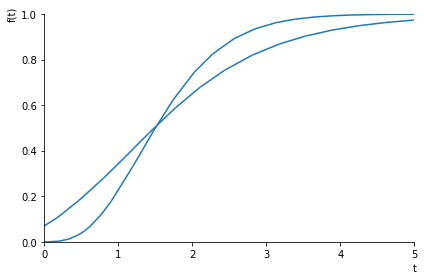

In [7]:
from sympy.plotting import plot

p1=plot(i_tot/15, xlim=(0,5),ylim=(0,1),show=False)
p2=plot(op_31, xlim=(0,5),ylim=(0,1),show=False)
p1.extend(p2)
p1.show()

# Monte-Carlo for the Florentine Families graph

Below are the functions we use for our Monte-Carlo simulations. We use two globally defined nx.Graphs `network` and `nextNetwork` to store node states and update the system in discrete time steps. At each time step, any susceptible node neighboring an infected node might become infected with some (small) infection probability `tau`. One run of the simulation then produces a set of lists: `itot` gives the total number of infected at each time-step and `iind` counts 0 for each node if it is susceptible and 1 if it is infected, at each time-step. 

In [8]:
import numpy as np
import random
import scipy.special as sc
import networkx as nx
import math

susceptible = "S"
infected = "I"

def initialize(G):
    '''
    Defines a nx graph 'network' and a copy of this graph as 'nextNetwork' such that all node states 
    are 'susceptible' except the node marked 'pat_0', which is initially infected.
    '''
    
    global network, nextNetwork
    
    
    network = nx.Graph()
    network.add_nodes_from(G.nodes)
    network.add_edges_from(G.edges)
    
    for i in network.nodes:
        network.nodes[i]['state'] = susceptible

    network.nodes[pat_0]['state'] = infected
    
    nextNetwork = network.copy()

def update(tau):
    '''
    Defines the dynamics of a single time-step. Each susceptible node neighboring an infected 
    becomes infected with probability 'tau'
    
    Updates the globally defined nx.graphs 'network' and 'nextNetwork'
    '''
    global network, nextNetwork

    for i in network.nodes:
        if network.nodes[i]['state'] == susceptible:
            nextNetwork.nodes[i]['state'] = susceptible
            for j in network.neighbors(i):
                if network.nodes[j]['state'] == infected:
                    if random.random() < tau:
                        nextNetwork.nodes[i]['state'] = infected
                        break
        else:
            nextNetwork.nodes[i]['state'] = infected

    network, nextNetwork = nextNetwork, network

def run_sim(tmax,tau):
    '''
    Runs the simulation until timestep 'tmax' with infection probability 'tau'
    
    Returns the list 'itot' containing the total number of infected in the network at each timestep 
    and the lists 'iind' containing the individual states at each time-step (0 for "S", 1 for "I") 
    '''
    N=len(network.nodes)   
    itot=[]
    iind=[]
    for i in network.nodes:
        iind.append([])
    
    #itwo=[]
    
    for t in range(tmax) :
        icount=0
        for i in network.nodes:
            if network.nodes[i]['state'] == "I":
                icount += 1

        itot.append(icount)
        
        for i in network.nodes:
            if network.nodes[i]['state'] == "I":
                iind[i].append(1)
            else :
                iind[i].append(0)
        
#         if network.nodes[4]['state'] == "I" and network.nodes[5]['state'] == "I":
#             itwo.append(1)
#         else :
#             itwo.append(0)
        
        if icount==N:
            pass
        else:
            update(tau)
    
    return itot, iind

def mc(G,tmax,tau,nruns):
    '''
    Monte Carlo of the SI outbreak on graph 'G' for 'tmax' timesteps and 'nruns' number of runs. 
    The infection probability 'tau' plays the role of delta t.
    
    Returns the list 'iav' containing the average number of infected at each timestep and 
    the lists 'ind_av', the average infected probability for each individual node. 
    '''
    global network
    
    N=len(G.nodes)
    st=time.time()
    ilist=[]
    ind_list=[]
    for i in range(N):
        ind_list.append([])
        
    #two_list=[]
    perc=10
    for i in range(nruns):
        
        initialize(G)
        a,b =run_sim(tmax,tau)
        ilist.append(a)
        for j in network.nodes:
            ind_list[j].append(b[j])
        #two_list.append(c)
        
        if int((i+1)*100/nruns)==perc:
            midt=time.time()
            print("{} % of runs completed in {} sec".format(perc, midt-st))
            perc+=10
            
    
    iav = np.mean(np.array(ilist)/N, axis=0)
    #istd = np.std(np.array(ilist)/N, axis=0)
    ind_av = []
    for i in network.nodes:
        ind_av.append(np.mean(np.array(ind_list[i]), axis=0))
    # two_av = np.mean(np.array(two_list), axis=0)
    
    return iav, ind_av

In [19]:
def pointsforplots(iav,tau,npoints):
    '''
    Takes the list of averages 'iav' and returns a selection of points 'npoints' for plotting
    '''
    global seltimes, tim
    
    seltimes=[int(i/tau/npoints) for i in range(int(len(iav)*tau*npoints))]
    
    isel=[iav[i] for i in seltimes]
    tsel=[tim[i] for i in seltimes]
    
    return tsel, isel

In [16]:
def sympy_to_list(symbol,tim):
    '''
    Takes a symbolic SymPy expression `symbol` and evaluates it at a set of point `tim` 
    to return a list for plotting
    '''
    arr=[]
    for i in tim:
        arr.append(symbol.evalf(subs={t:i}))
    return arr

Here we set our parameters. As there is only one parameter in the model, the infection probability `tau`, this parameter plays the role of the small time-step. We make sure that `tau` is sufficiently small to have at most a single state flip per time-step. A value of `tau=0.002` was found to suffice. 

`tmax` here is the maximal dimensionless time which we consider, and we divide this in `tmax/tau` time steps of size `tau` each.  

In [12]:
tau=0.002
tmax=5
nsim=int(1e2)
tim = np.linspace(0,tmax,int(tmax/tau))

Lets run the simulation for `nsim` times and plot the result against the exact function:

In [13]:
itot, iind = mc(G,int(tmax/tau),tau,nsim)

10 % of runs completed in 0.9914045333862305 sec
20 % of runs completed in 2.0058393478393555 sec
30 % of runs completed in 3.0554773807525635 sec
40 % of runs completed in 4.131074666976929 sec
50 % of runs completed in 5.1910810470581055 sec
60 % of runs completed in 6.272375822067261 sec
70 % of runs completed in 7.3236048221588135 sec
80 % of runs completed in 8.327696800231934 sec
90 % of runs completed in 9.356384038925171 sec
100 % of runs completed in 10.400964260101318 sec


In [17]:
itot_ex=sympy_to_list(i_tot/15,tim)

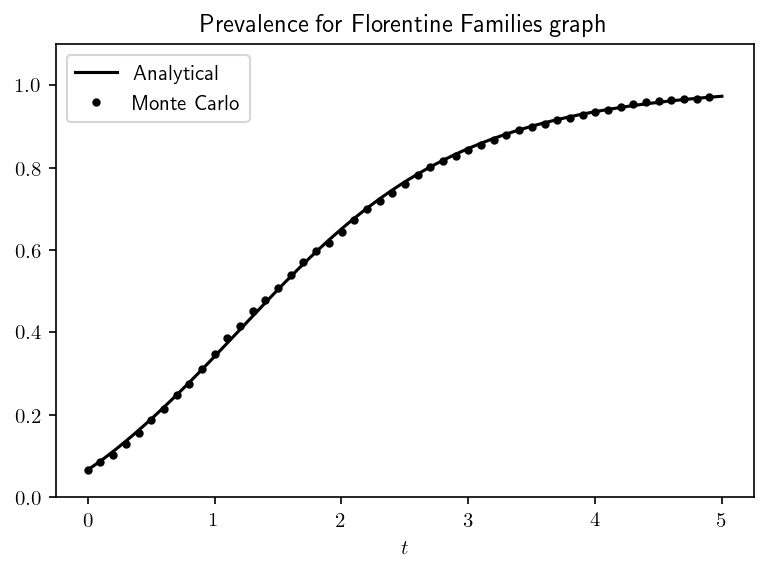

In [21]:
plt.figure(dpi=150)
plt.rc('text', usetex=True)
itot_plot=pointsforplots(itot,tau,10)
plt.ylim([0,1.1])
plt.plot(tim,itot_ex,'k', label="Analytical")
plt.plot(itot_plot[0],itot_plot[1],'k.',label="Monte Carlo")
#plot_tot_MF()
plt.xlabel(r"$t$")
plt.title("Prevalence for Florentine Families graph")
plt.legend()
plt.show()

The match is already quite good, but not enough statistics to be exactly on the line. Below we will increase the statistics by storing each run to file and then computing the averages over this larger dataset. 

First, let's add the individual-based mean-field theory prediction by numerically integrating the mean field equations:

$$
\partial_t n_I^i(t)  = \sum_{j=1}^N A^{ij} (1 - n_I^i(t)) n_I^j(t) 
$$

where $n_I^i(t)$ is the expectation value for node $i$ to be infected at time $t$ and $A^{ij}$ the adjacency matrix of the network. Note that we have gone here to dimensionless time $t$ by setting the infection rate to one.

In [154]:
from scipy.integrate import odeint

N = 15
tim2 = np.linspace(0,tmax,200)

#Function for numerical integration of the SIR equations
def differential_MF(n_MF, tim2):
    '''
    Computes the rate of change for the mean field expectiation values `n_MF` for individual nodes 
    in the globally defined network `G` for time 'tim2'
    
    Returns tuple `dMF_dt` containing the differential of each individual node in the network
    '''
    global G
    
    dMF_dt=[]
    for i in range(N):
        dMF_dti = 0
        for j in G[i]:
            dMF_dti += (1-n_MF[i])*n_MF[j]
        dMF_dt.append(dMF_dti)
    return tuple(dMF_dt)
    

#Function for plotting the equations
def plot_MF(node_list) :
    '''
    Integrates the mean-field equations and plots the numerical solutions for all individual nodes
    '''

    #Obtain the solution from the numerical integration (odeint)
    y0 = (0,0,0,1,0,0,0,0,0,0,0,0,0,0,0)
    solution = odeint(differential_MF, y0, tim2)
    solution = [[row[i] for row in solution] for i in range(N)]

    # plot numerical solution
    for x, i in enumerate(node_list):
        plt.plot(tim2, solution[i], ":",  color=nodecolors[x]) #label=r"$n_{\textsc{i}}^{\rm %2s}(t)$" %ff_names[i],

    
def plot_tot_MF() :
    '''
    Integrates the mean-field equaitons and plots the numerical solution for the total infected probability
    '''
    #Obtain the solution from the numerical integration (odeint)
    y0 = (0,0,0,1,0,0,0,0,0,0,0,0,0,0,0)
    solution = odeint(differential_MF, y0, tim2)
    itot = []
    for row in solution:
        itot.append(sum(row)/N)
    
    # plot numerical solution
    
    plt.plot(tim2, itot, "g:", label = "Mean-field")

Now, we reproduce the last plot, but with the mean-field curve added. As shown, the mean-field result overestimates the exact result as well as the numerical data. 

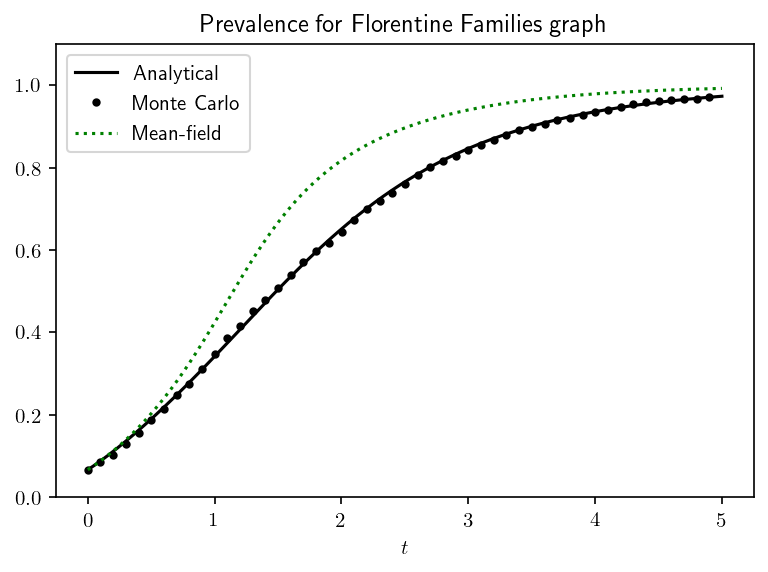

In [24]:
plt.figure(dpi=150)
plt.rc('text', usetex=True)
itot_plot=pointsforplots(itot,tau,10)
plt.ylim([0,1.1])
plt.plot(tim,itot_ex,'k', label="Analytical")
plt.plot(itot_plot[0],itot_plot[1],'k.',label="Monte Carlo")
plot_tot_MF()
plt.xlabel(r"$t$")
plt.title("Prevalence for Florentine Families graph")
plt.legend()
plt.show()

# Increasing the statistics

Next, we adapt the above code to store the simulation runs on a local file. This way, each run performed will increase the statistics and in the end we may compute the average of the locally stored files. This we use to produce the plot of the main paper.

In [29]:
def run_and_write_sim(tmax,tau):
    '''
    Runs the simulation until timestep 'tmax' with infection probability 'tau'
    
    Appends the simulation data to a local file. 
    '''
    global tim
    
    N=len(network.nodes)   
    itot=[]
    iind=[]
    for i in network.nodes:
        iind.append([])
    
    #itwo=[]
    
    for t in range(tmax) :
        icount=0
        for i in network.nodes:
            if network.nodes[i]['state'] == "I":
                icount += 1

        itot.append(icount)
        
        for i in network.nodes:
            if network.nodes[i]['state'] == "I":
                iind[i].append(1)
            else :
                iind[i].append(0)
        
#         if network.nodes[4]['state'] == "I" and network.nodes[5]['state'] == "I":
#             itwo.append(1)
#         else :
#             itwo.append(0)
        
        if icount==N:
            pass
        else:
            update(tau)
    
    
    with open('FF_itot_tau='+str(tau)+'.csv', 'a+', newline='') as write_obj:
        csv_writer = csv.writer(write_obj)
        csv_writer.writerow(itot)
    
    for i in network.nodes:
        if i!=3:
            with open('FF_i'+str(i)+'_tau='+str(tau)+'.csv', 'a+', newline='') as write_obj:
                csv_writer = csv.writer(write_obj)
                csv_writer.writerow(iind[i])    

Now each time `run_and_write_sim` is called, the data file will grow:

In [116]:
for i in range(int(3e4)):
    initialize(G)
    run_and_write_sim(int(tmax/tau),tau)

Finally, we compute the averages of the local file, as well as the standard deviation to get an idea of the error estimate

In [36]:
import statistics
st=time.time()
iav=[]
istd=[]

seltimes=[int(i/tau/10) for i in range(int(tmax*10))]
tsel=[tim[i] for i in seltimes]

for i in seltimes:
    reader = csv.reader(open('FF_itot_tau=0.002.csv'))
    values = [eval(row[i]) for row in reader]
    iav.append(statistics.mean(values))
    istd.append(statistics.stdev(values))

nruns=len(values)
et=time.time()
print('Averages loaded in t = ',et-st)
print('Number of runs:',len(values))

Averages loaded in t =  318.15395426750183
Number of runs: 60001


In [37]:
st=time.time()
imedici=[]
istd_medici=[]

seltimes=[int(i/tau/10) for i in range(int(tmax*10))]
tsel=[tim[i] for i in seltimes]

for i in seltimes:
    reader = csv.reader(open('FF_i1_tau=0.002.csv'))
    values = [eval(row[i]) for row in reader]
    imedici.append(statistics.mean(values))
    istd_medici.append(statistics.stdev(values))

et=time.time()
print('Averages loaded in t = ',et-st)
print('Number of runs:',len(values))

Averages loaded in t =  177.5859558582306
Number of runs: 50000


In [38]:
imed_ex=sympy_to_list(op_31,tim)

In [83]:
def coloring_plot(g) :
    '''
    Creates list of node colors, depending on whether the nodes of the network 'g' are sus, inf, or rec
    '''
    nodecolor=[]
    for i in g.nodes:
        if g.nodes[i]['state'] == 'X':
            nodecolor.append("darkred")
        else :
            nodecolor.append("tomato")
    
    return nodecolor


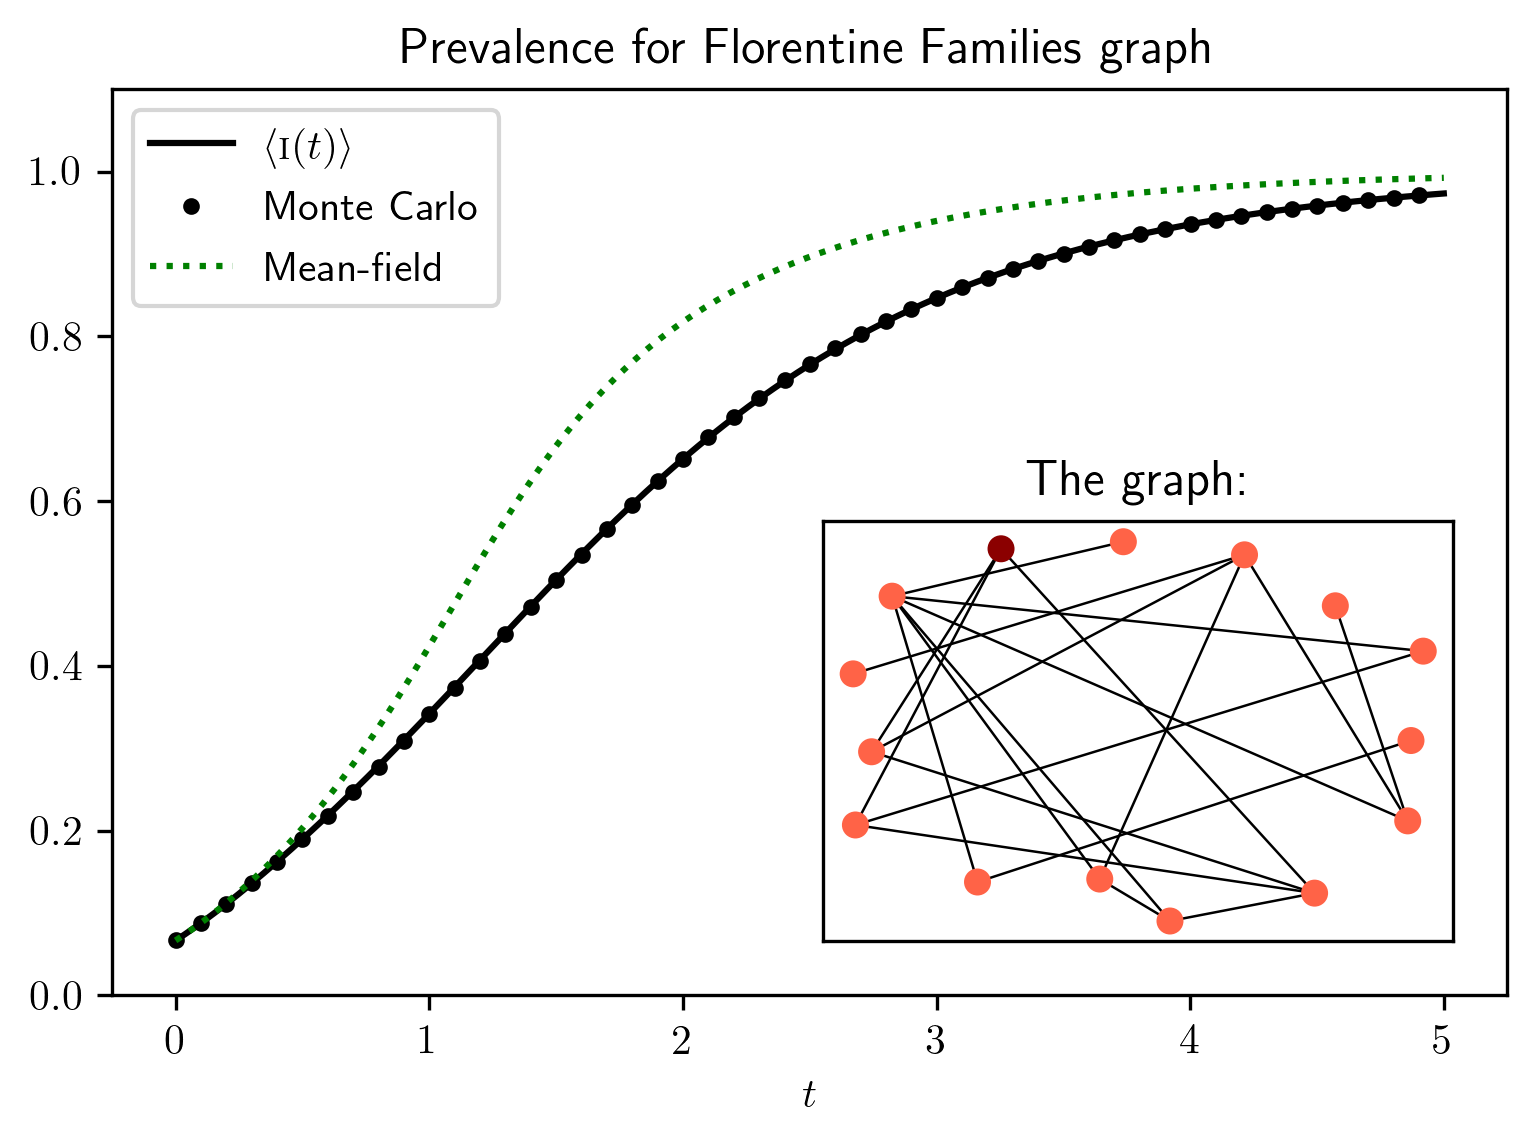

In [97]:
dsb="deepskyblue"
itot_sim=[i/15 for i in iav]
plt.figure(dpi=300)
plt.rc('text', usetex=True)
#itot_plot=pointsforplots(itot_sim,tau,10)
#iind_plot=pointsforplots(imedici,tau,10)
plt.ylim([0,1.1])
plt.plot(tim,itot_ex,'k', label=r"$\langle \textsc{i}(t) \rangle$")
plt.plot(tsel,itot_sim,'k.',label="Monte Carlo")
plot_tot_MF()

#plt.plot(tim,imed_ex,dsb,label=r"$\langle \textsc{i}^{\rm medici} (t) \rangle $")
#plt.plot(tsel,imedici, color=dsb,  marker='.', ls=' ')
plt.xlabel(r"$t$")
plt.title("Prevalence for Florentine Families graph")
plt.legend()

#Create subplot with network
a = plt.axes([0.52, 0.17, .35, .35] , facecolor='w')
nx.draw_networkx(G, node_color=coloring_plot(G), width=.6 ,node_size = 30 ,with_labels=False)
plt.title('The graph:')
plt.savefig('FF_plot.pdf')
plt.show()

The next plot shows that the error between the exact result and the average over all simulation runs is comparable to the standard deviation over the square root of the number of simulation runs. 

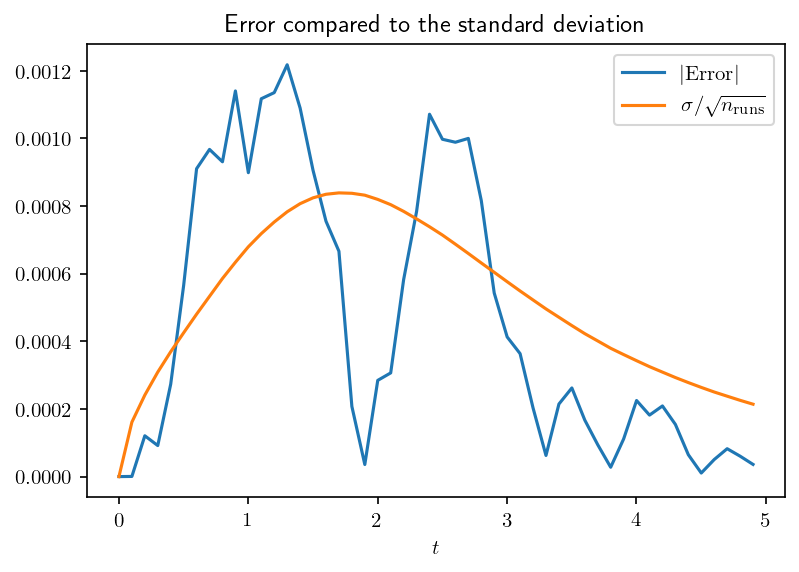

In [57]:
itot_ex_sel=[itot_ex[i] for i in seltimes]
diff=[abs(itot_ex_sel[i]-itot_sim[i]) for i in range(len(tsel))]
plt.figure(dpi=150)
plt.plot(tsel,diff, label=r"$|{\rm Error}|$")
plt.plot(tsel,np.array(istd)/(15*math.sqrt(nruns)), label=r"$\sigma/ \sqrt{n_{\rm runs}}$")
plt.xlabel(r"$t$")
plt.title("Error compared to the standard deviation")
plt.legend()
plt.show()

# Individual expectation values

Finally, we compare the simulation data with the individual expectation values contained in the list `op_ls`. 

In [147]:
def plot_one_point_ex(j, tim, color):
    '''
    Creates a plot of the exact result for node `i` contained in the list `op_ls`. 
    '''
    global op_ls
    
    symbol=op_ls[j]
    plot_fun=sympy_to_list(symbol,tim)
    plt.plot(tim,plot_fun, label=r"$\langle \textsc i^{ \rm %2s}(t)\rangle$" %ff_names[j],linewidth=1, color=color)

Load the individual expectation values from file and compute the averages:

In [58]:
st=time.time()
iind=[]
for i in range(15):
    iind.append([])

seltimes=[int(i/tau/10) for i in range(int(tmax*10))]
tsel=[tim[i] for i in seltimes]

for j in range(15):
    if j!=3:
        for i in seltimes:
            reader = csv.reader(open('FF_i'+str(j)+'_tau=0.002.csv'))
            values = [eval(row[i]) for row in reader]
            iind[j].append(statistics.mean(values))
            #istd_medici.append(statistics.stdev(values))

et=time.time()
print('Averages loaded in t = ',et-st)
print('Number of runs:',len(values))

Averages loaded in t =  2331.7661838531494
Number of runs: 50000


Create the plot for the individual prevalences

In [156]:
def coloring_ind(g) :
    '''
    Creates list of node colors, depending on whether the nodes of the network 'g' are sus, inf, or rec
    '''
    nodecolor=[]
    
    x=0
    for i in g.nodes:
        if i in node_list:
            
            nodecolor.append(nodecolors[x])
            x+=1
        elif i == 3:
            nodecolor.append('darkred')
        else :
            nodecolor.append("gray")
    
    return nodecolor

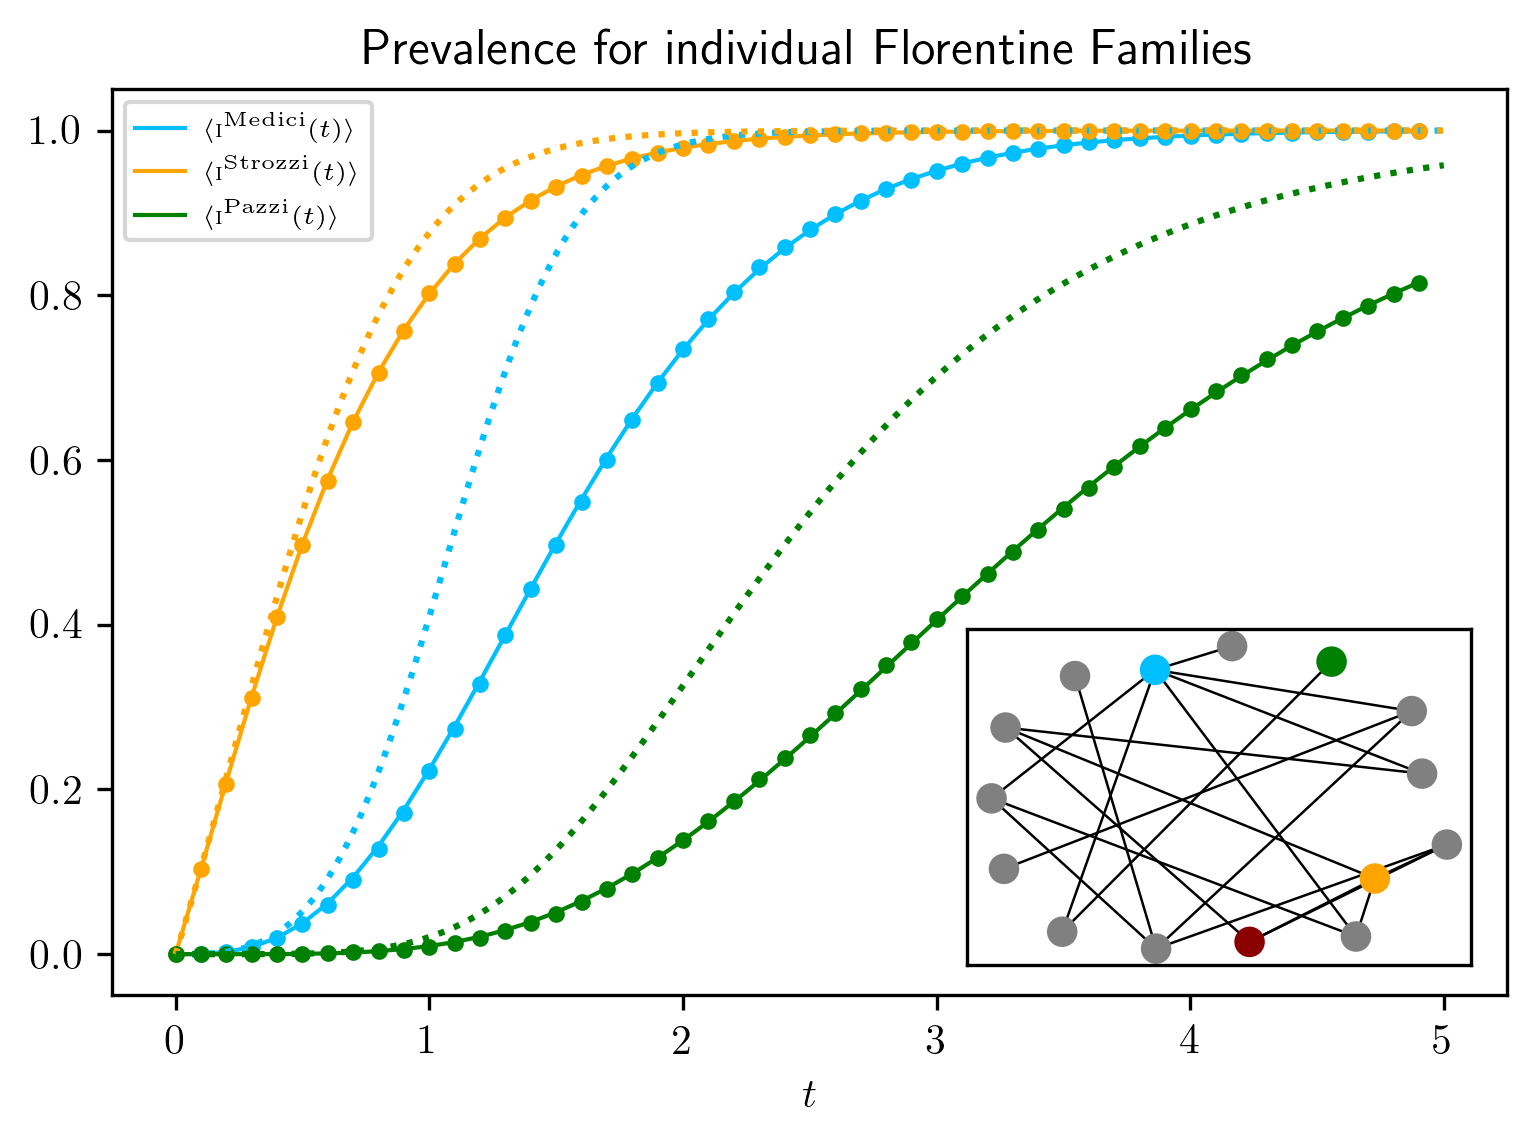

In [166]:
plt.figure(dpi=300)
plt.rc('text', usetex=True)
node_list=[1,4,10]
nodecolors=['deepskyblue','orange','green']
for x, i in enumerate(node_list):
    if i != 3:
        plot_one_point_ex(i,tsel,nodecolors[x])
        plt.plot(tsel,iind[i],'.', color=nodecolors[x])
plot_MF(node_list)
plt.xlabel(r"$t$")
plt.title("Prevalence for individual Florentine Families")
plt.legend(fontsize=6, loc=2)

#Create subplot with network
a = plt.axes([0.6, 0.15, .28, .28] , facecolor='w')
nx.draw_networkx(G, node_color=coloring_ind(G), width=.6 ,node_size = 40 ,with_labels=False)
plt.savefig("ind_FF.pdf")
plt.show()